<h1><center> Tópicos Avançados em Python para Análise de Dados </center></h1>

![](https://drive.google.com/uc?export=view&id=1qCH-jlzKK1aFaTBpiTHN4qxTFrCVs720) 

<center>
<h5>
O objetivo desse material é mostrar a você como aplicar diversos métodos das duas bibliotecas mais famosas para Ciência de Dados: Pandas e Seaborn. Ao longo do curso além de conhecermos como essas ferramentas funcionam vamos praticar a análise em dados reais e transformar os dados que temos em informações. 
Vamos nessa!
<h5>
<center>

## Módulo 5

### Exercício 5

Nesse exercício vamos trabalhar com uma base de dados que apresenta informações sobre *startups* e investimentos via [Crunchbase](https://www.crunchbase.com/) (plataforma para encontrar informações comerciais sobre empresas privadas e públicas). Nesse arquivo vamos encontrar os investimento feitos nas *startups* e ele apresenta as seguintes características:


* **Name** -> Nome da *startup*
* **Category_list** -> Em qual categoria as startups se enquadram
* **Market** ->  Qual mercado a startup atende
* **Funding_total_usd** -> Financiamento total recebido (em dólares americanos)
* **Status** -> Status operacional atual
* **Country_code** -> País de Origem
* **State_code** -> Estado de Origem 
* **City** -> CIdade 
* **Funding_rounds** ->Rodadas totais de financiamento
* **Founded_at** -> Data de fundação
* **Founded year** -> Ano de fundação
* **First_funding_at** -> Data do primeiro financiamento
* **Last_funding_at** -> Data do último financiamento
* **Seed** -> Financiamento inicial recebido (em dólares americanos)
* **Venture** -> Financiamento de risco recebido (em dólares americanos)
* **Equity_crowdfunding** -> Financiamento recebido diluindo o patrimônio
* **Undisclosed** -> Outras fontes de financiamento não divulgadas
* **Convertible_note** -> Financiamento recebido de notas conversíveis
* **Debt_financing** -> Financiamento recebido de dívidas
* **Angel** -> Financiamento recebido de investidores anjo
* **Grant** -> Financiamento de doações
* **Private_equit** -> Financiamento de capital privado


Obs: para fins didáticos a base de dados utilizada nesse exercício é uma adaptação da original

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1) Importe os dados

obs: esses dados não podem ser lidos através do código padrão do Pandas (encoding = 'utf-8'), você deve passar como parâmetro o 'unicode_escape'

In [ ]:
df = pd.read_csv('investments.csv', encoding='unicode_escape')
df.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York,1.0,2012-06-01,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,|Games|,Games,4000000,operating,USA,CA,Los Angeles,2.0,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,1.0,2012-10-26,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,1.0,2011-04-01,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Fort Worth,2.0,2014-01-01,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0


2) De acordo com a base de dados quais são os países que mais apresentam *startups*? 


Faça o gráfico de forma que apenas os 20 primeiros países sejam apresentados e os demais apareçam como um grupo único de denominado *outros*

In [ ]:
grupos = list(df.country_code.value_counts().head(20).index.values)
grupos.append('Outros')

valores = list(df.country_code.value_counts().head(20).values)
add = df.country_code.value_counts()[20:].sum()
valores.append(add)

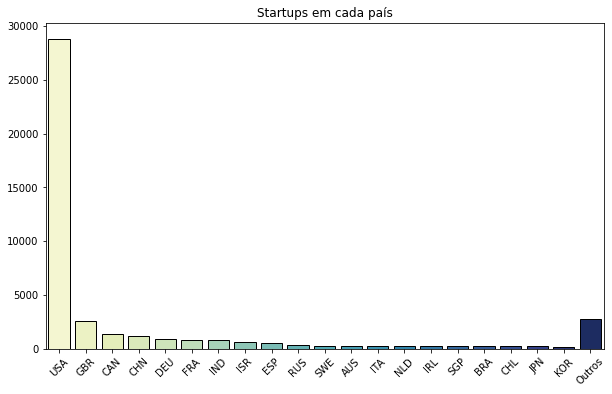

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=grupos, y=valores, palette="YlGnBu", edgecolor='k')
plt.title('Startups em cada país')
plt.xticks(rotation=45)
plt.show()

3) Qual o mercado que mais apresentou *startups*?

Assim como fizemos o gráfico acima, plote apenas as 15 áreas mais presentes na base de dados

In [ ]:
mercados = list(df.market.value_counts().head(15).index.values)
counts = list(df.market.value_counts().head(15).values)

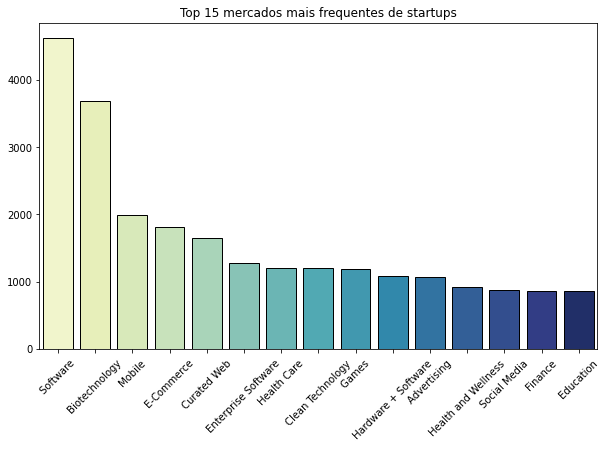

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=mercados, y=counts, palette="YlGnBu", edgecolor='k')
plt.title('Top 15 mercados mais frequentes de startups')
plt.xticks(rotation=45)
plt.show()

4) Utilizando o método query, faça o que se pede:
* Encontre o dados da startup Uber
* Encontre quantas empresas foram criadas entre os anos 1980 e 2017
* Dada a lista com os nomes das startups: [Uber, Amazon, Google, Dropbox, Facebook, Alibaba, Stripe, Airbnb, Robinhood, Reddit, DigitalOcean, Coursera.] selecione as instâncias em que o nome está presente na lista:

In [ ]:
df.query("'Uber' in name")

,name,category_list,market,funding_total_usd,status,country_code,state_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity
37025,Uber,|Transportation|Design|SEO|Automotive|Real Tim...,Transportation,1507450000,operating,USA,CA,San Francisco,6.0,2009-03-01,2009.0,2009-08-01,2014-06-06,200000.0,1.506000e+09,0.0,0.0,0.0,0.0,1250000.0,0.0,0.0


In [ ]:
info = df.query('founded_year >= 1980 and founded_year <= 2017')
print('Temos '+str(len(info))+' empresas fundadas entre 1980 e 2017')

Temos 31834 empresas fundadas entre 1980 e 2017


In [ ]:
startup_unicorns = ["Uber","Amazon","Google","Dropbox","Facebook","Alibaba",
                     "Stripe","Airbnb","Robinhood","Reddit",
                    "DigitalOcean","Coursera"]

df.query('name in @startup_unicorns')

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
1622,Airbnb,|Hotels|Travel|,Travel,"79,48,20,000",operating,USA,CA,SF Bay Area,San Francisco,6.0,2008-08-01,2008-08,2008-Q3,2008.0,2009,2014,620000.0,7.942000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,7200000.0,112000000.0,200000000.0,4.750000e+08,0.0,0.0,0.0,0.0
1866,Alibaba,|E-Commerce|,E-Commerce,"1,11,20,00,000",operating,CHN,NaN,Hangzhou,Hangzhou,4.0,1999-06-01,1999-06,1999-Q2,1999.0,1999,2005,0.0,0.000000e+00,0.0,0.0,0.0,0.0,5000000.0,0.0,1.107000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
2174,Amazon,|Consumer Goods|Groceries|Crowdsourcing|E-Comm...,Consumer Goods,"80,00,000",operating,USA,WA,Seattle,Seattle,1.0,1994-01-01,1994-01,1994-Q1,1994.0,1995,1995,0.0,8.000000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,8000000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
10129,Coursera,|Education|,Education,"8,50,00,000",operating,USA,CA,SF Bay Area,Mountain View,4.0,2012-01-01,2012-01,2012-Q1,2012.0,2012,2013,0.0,8.500000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,6000000.0,63000000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
11736,DigitalOcean,|Finance|Virtualization|Networking|Cloud Compu...,Cloud Computing,"4,02,05,800",operating,USA,NY,New York City,New York,4.0,2011-06-24,2011-06,2011-Q2,2011.0,2012,2014,3205800.0,3.700000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,37000000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
12372,Dropbox,|Cloud Data Services|Storage|Web Hosting|,Cloud Data Services,"1,10,72,15,000",operating,USA,CA,SF Bay Area,San Francisco,6.0,2007-06-01,2007-06,2007-Q2,2007.0,2007,2014,15000.0,6.072000e+08,0.0,0.0,0.0,500000000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,7200000.0,250000000.0,350000000.0,0.000000e+00,0.0,0.0,0.0,0.0
14701,Facebook,|Communities|Identity|All Students|Colleges|Fa...,Communities,"2,42,57,00,000",operating,USA,CA,SF Bay Area,Menlo Park,11.0,2004-02-04,2004-02,2004-Q1,2004.0,2004,2011,0.0,6.152000e+08,0.0,0.0,0.0,100000000.0,500000.0,0.0,1.710000e+09,0.0,0.0,0.0,0.0,12700000.0,27500000.0,375000000.0,2.000000e+08,0.0,0.0,0.0,0.0
17599,Google,|Software|Video Streaming|Information Technolo...,Software,"2,51,00,000",operating,USA,CA,SF Bay Area,Mountain View,2.0,1998-09-07,1998-09,1998-Q3,1998.0,1998,1999,0.0,2.500000e+07,0.0,0.0,0.0,0.0,100000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,25000000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
35173,Reddit,|Social Media|News|,News,"5,01,00,000",acquired,USA,CA,SF Bay Area,San Francisco,2.0,2005-01-01,2005-01,2005-Q1,2005.0,2005,2014,100000.0,5.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,50000000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
36100,Robinhood,|Personal Finance|Stock Exchanges|Finance|Mobile|,Personal Finance,"1,60,00,000",operating,USA,CA,SF Bay Area,Palo Alto,3.0,2013-01-01,2013-01,2013-Q1,2013.0,2013,2014,3000000.0,1.300000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,13000000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0


5) Considerando os anos de 1980 até os dias atuais, em qual ano foram fundadas a maior parte das *startups*? Crie um gráfico para mostrar isso e marque as empresas consideradas *unicórnios* (empresas de tecnologia privadas avaliadas em mais de um bilhão de dólares antes de abrir seu capital em bolsas de valores).


Dica: para marcar o ano de fundação no gráfico use o método [plt.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


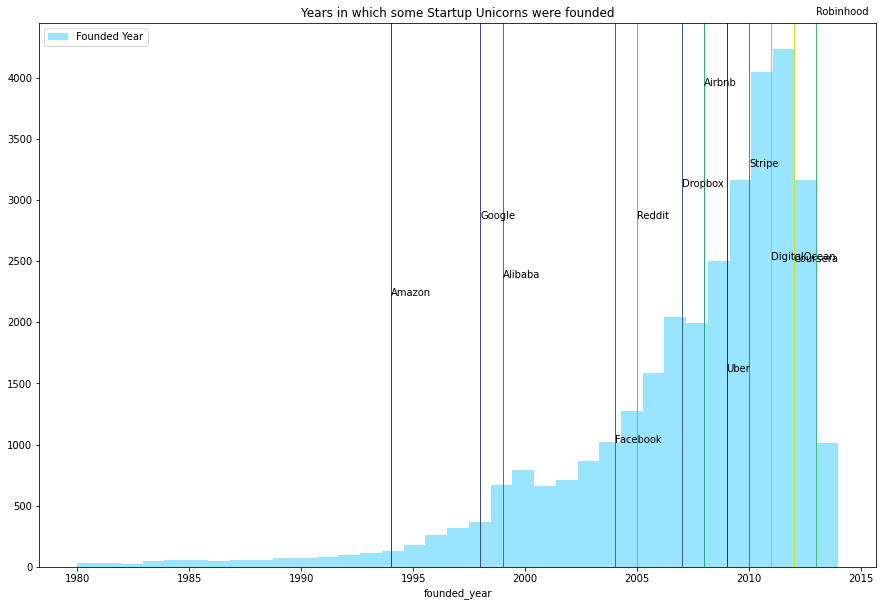

In [ ]:
import random
plt.figure(figsize=(15,10))

color = sns.color_palette('viridis',len(startup_unicorns)).as_hex()
founded_year= 

sns.histplot(df.founded_year[df.founded_year >=1980], bins=35,
            kde=False, label='Founded Year', color='deepskyblue')

for i,j,c in zip(founded_year, startup_unicorns, color):
    plt.axvline(i, color=c, linewidth=1)
    plt.text(i,y=random.choice(range(1000,5000)),s=j)

plt.title("Anos de fundação das startups")
plt.legend(loc=0)
plt.show()

6) Veja quais são as 10  *startups* que receberam os maiores valores de financiamento total (funding_total_usd). Quais dos unicórnios estão presentes nessas 10 com maior financiamento?

In [ ]:
df.sort_values(ascending=False,by='funding_total_usd')[['name','funding_total_usd']][0:10]

name,funding_total_usd
Verizon Communications,30079503000
Sberbank,5800000000
Clearwire,5700000000
Charter Communications,5162513431
First Data Corporation,3500000000
COFCO,3200000000
sigmacare,2600000000
Facebook,2425700000
Carestream,2400000000
Flipkart,2351140000


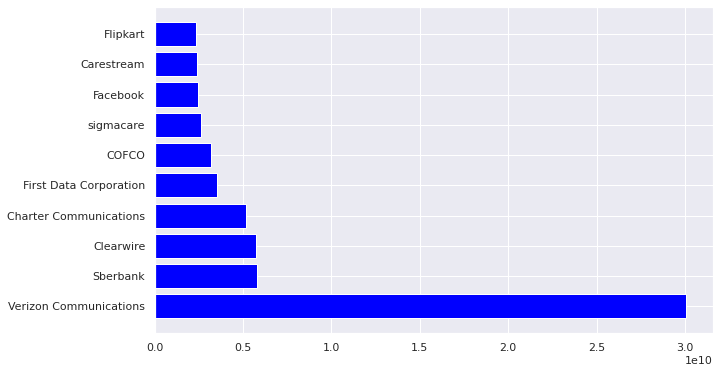

In [ ]:
df1 = df.sort_values(by='funding_total_usd',ascending=False)[0:10]

sns.set()
plt.figure(figsize=(10,6))
plt.barh(y=df1.name, width=df1.funding_total_usd, color='blue')


plt.show()